<a href="https://colab.research.google.com/github/siyaboban/Crop-recommendation/blob/main/Crop__recommendation_code_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Check for null values in each column
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [6]:
#check for statistical properties
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
#check for any duplicates values
df.duplicated().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

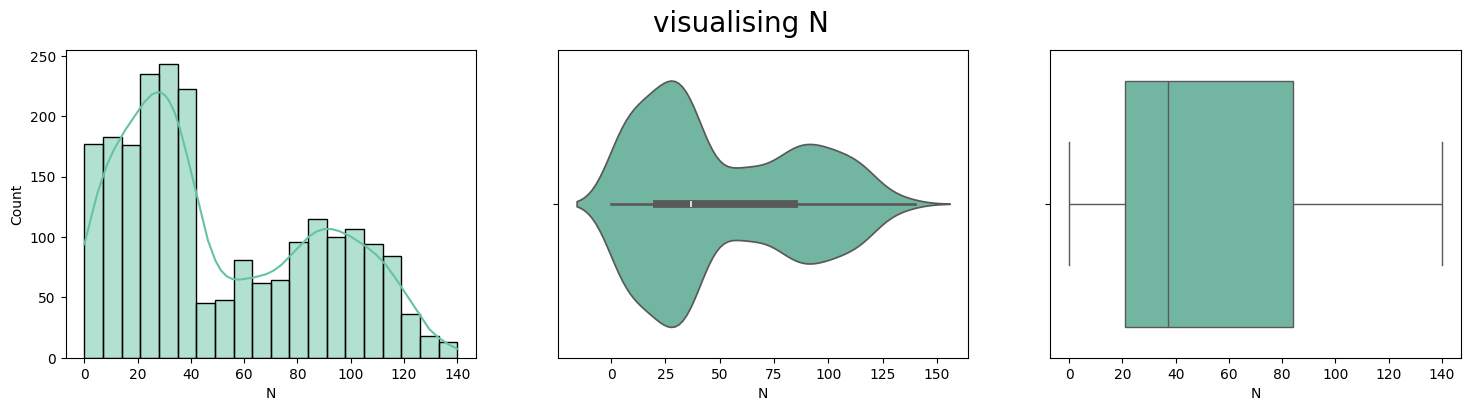

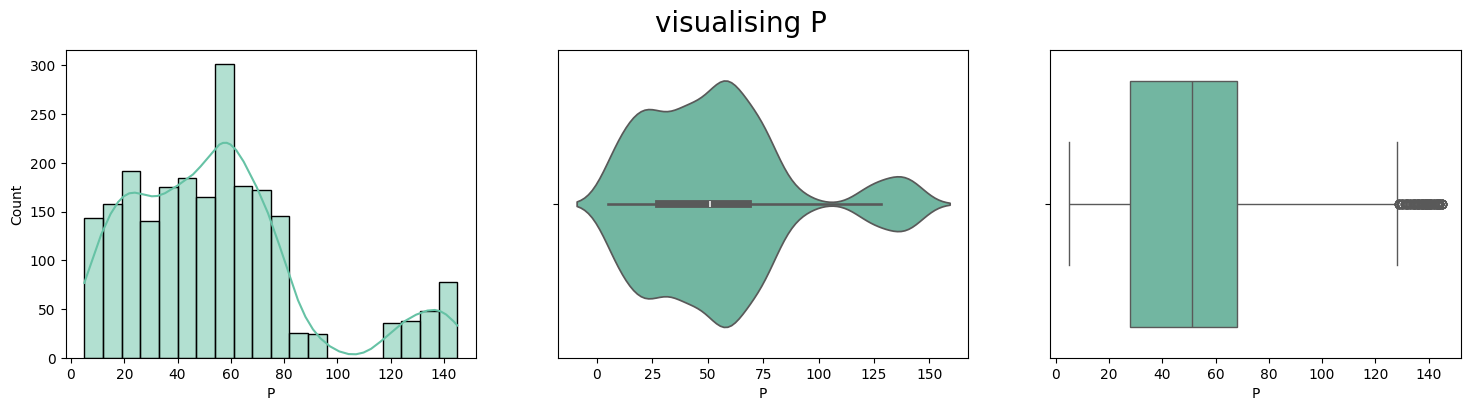

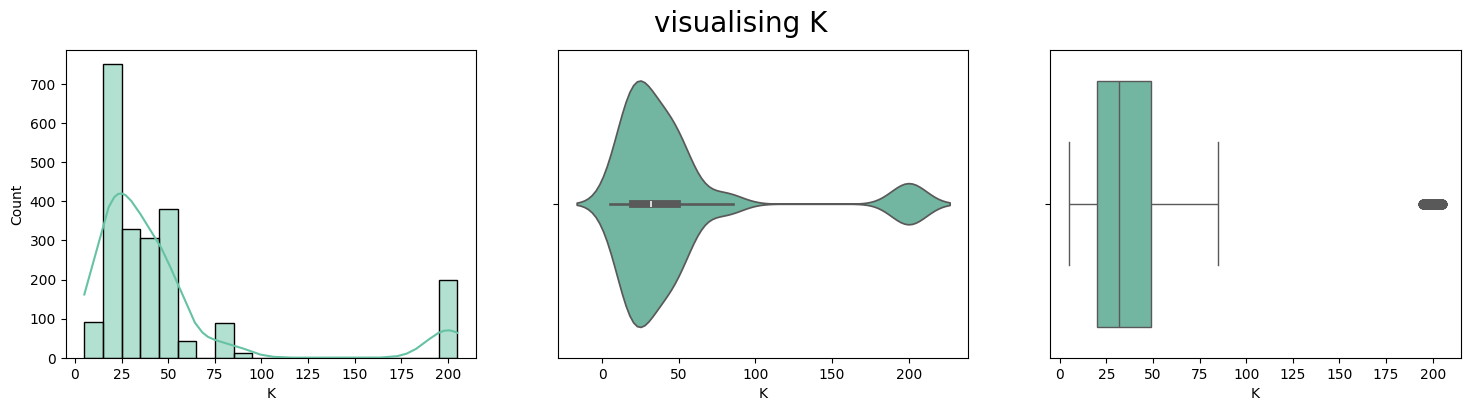

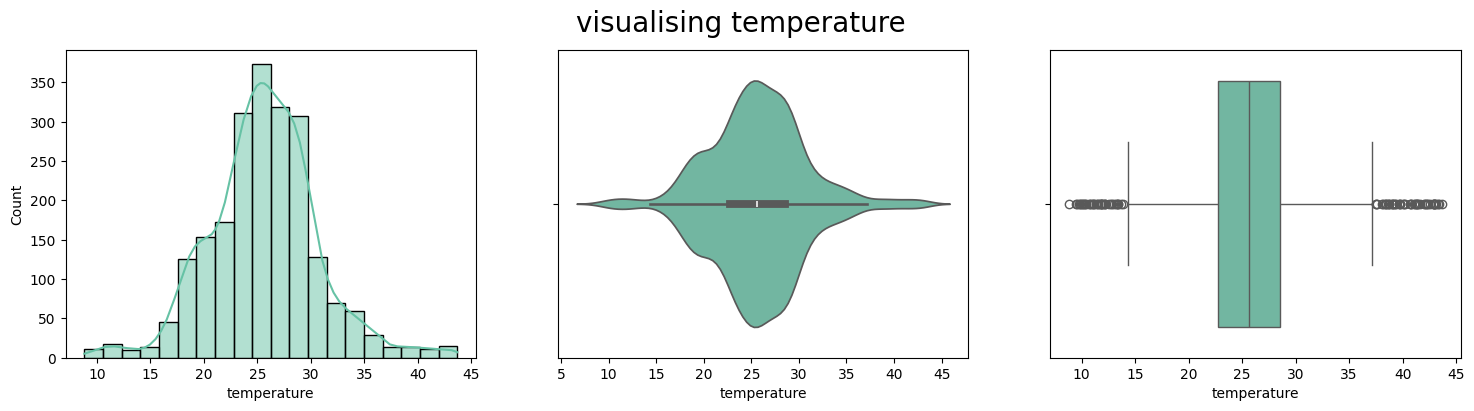

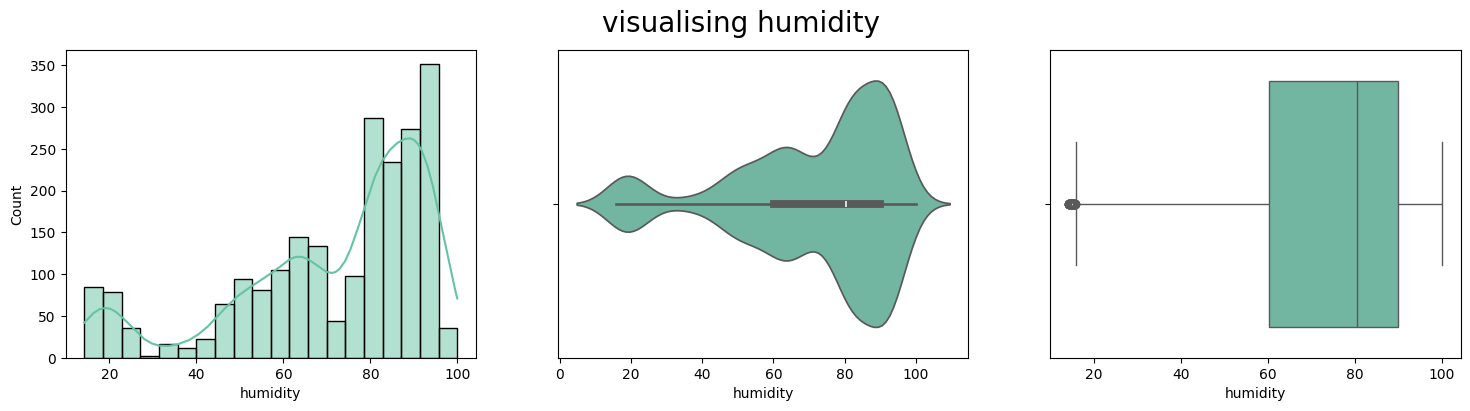

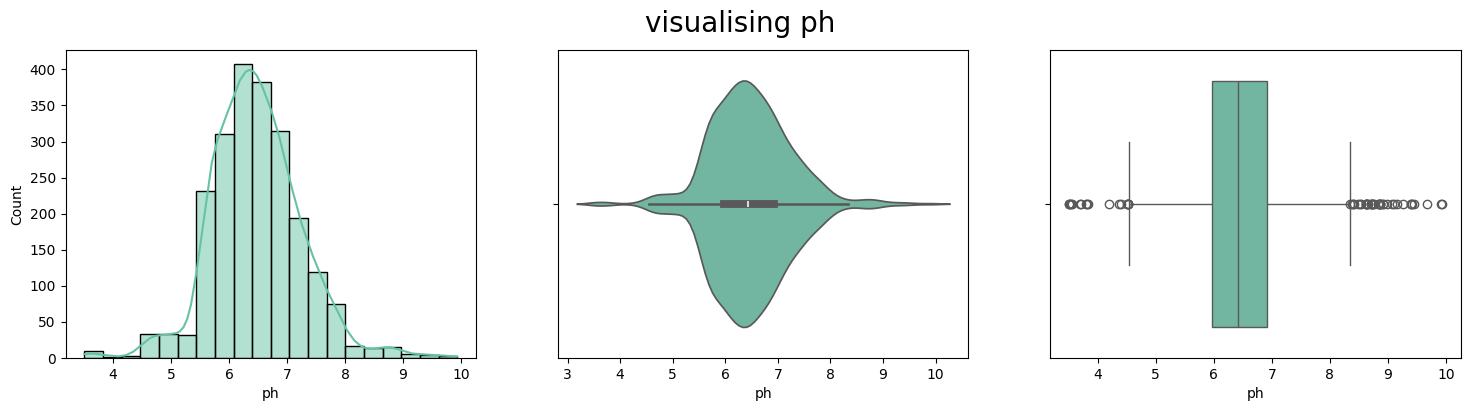

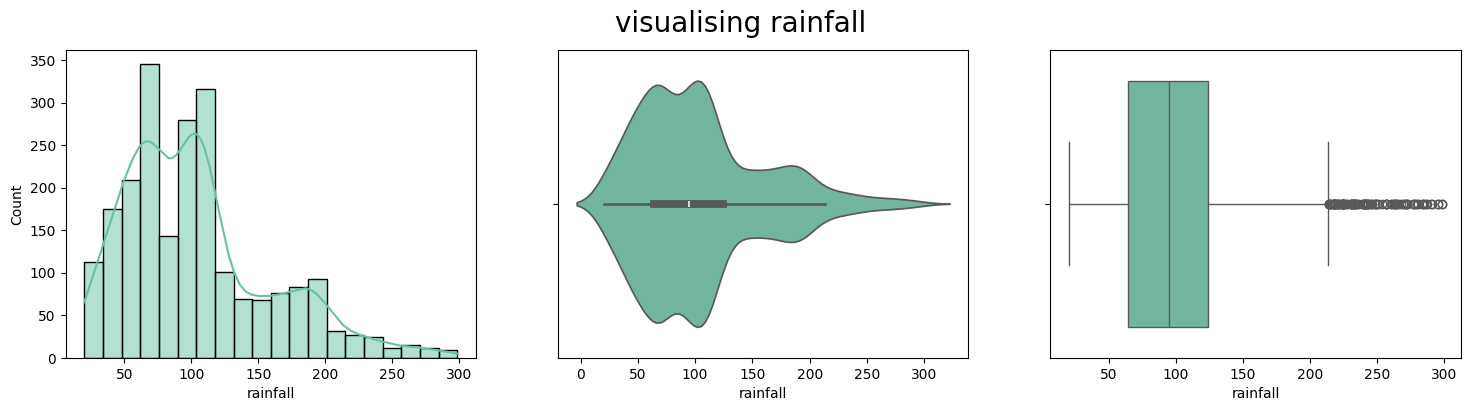

In [9]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
  fig,ax=plt.subplots(1,3,figsize=(18,4))
  sns.histplot(data=df, x=i, kde=True, bins=20,ax=ax[0])
  sns.violinplot(data=df, x=i,ax=ax[1])
  sns.boxplot(data=df, x=i, ax=ax[2])
  plt.suptitle(f'visualising {i}', size=20)

In [10]:
corr = df.drop(['label'], axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

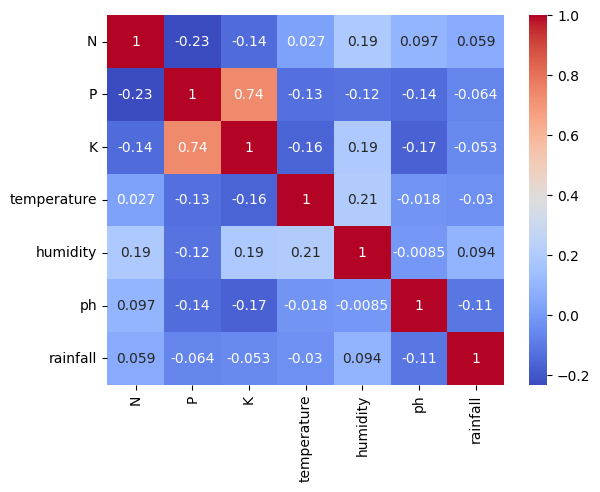

In [11]:
sns.heatmap(corr, annot= True, cbar= True, cmap= 'coolwarm')

In [12]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


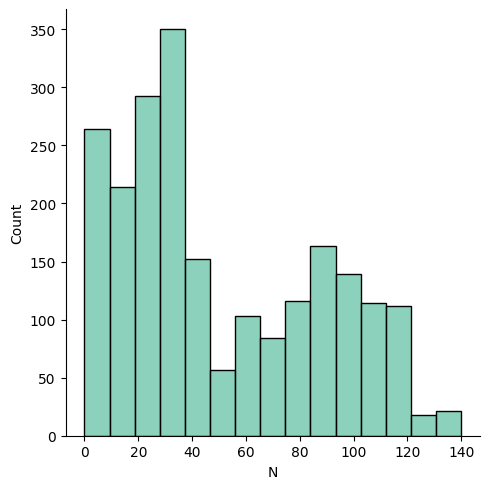

In [13]:
sns.displot(df['N'])

In [14]:
#Converting Categorical varibales to a integer format

crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=df['label'].map(crop_dict)
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [15]:
# Removing Label column from the dataset

df= df.drop('label', axis=1)
df

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [16]:
df.shape

(2200, 8)

In [17]:
df.to_csv("cleaned_df.csv", index = False)


**ML Model Implementation**

In [18]:
df_Ip = df.drop('crop_num',axis=1)
df_Op = df['crop_num']

In [19]:
from sklearn.model_selection import train_test_split as df_split

Xtrain, Xtest, Ytrain, Ytest = df_split(df_Ip, df_Op, test_size=0.2, random_state= 30)
Xval, Xtest, Yval, Ytest = df_split(Xtest, Ytest, test_size= 0.5, random_state= 30)

In [20]:
print("\nTraining Shape    :", Xtrain.shape)
print("\nValidation Shape  :", Xval.shape)
print("\nTesting Shape     :", Xtest.shape)


Training Shape    : (1760, 7)

Validation Shape  : (220, 7)

Testing Shape     : (220, 7)


In [21]:
from sklearn.metrics import confusion_matrix as df_confusM
from sklearn.metrics import ConfusionMatrixDisplay as df_disp
from sklearn.metrics import classification_report as df_rep
from sklearn import metrics as df_Mt
import matplotlib.pyplot as df_plt
import time as time
import warnings as df_wgs
df_wgs.filterwarnings("ignore")

Random Forest Classifier


In [22]:
from sklearn.ensemble import RandomForestClassifier as df_rf
from sklearn.model_selection import RandomizedSearchCV as df_rsv
parameters = {'n_estimators': [20, 40, 80, 100],
                   'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_depth': [3, 7, 9, 12]}


# Initialize the RandomForestClassifier
model = df_rf(random_state= 40)

# Initialize RandomizedSearchCV with the model and parameters
random_search = df_rsv(model, parameters, cv=2, verbose=10)

# Fit the RandomizedSearchCV object to the data
random_search.fit(Xtrain, Ytrain)

print("\nRandom Forest Parameters selected by Random Search :")
print(random_search.best_params_)
print("\nRandom Forest Score: ", random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START criterion=log_loss, max_depth=7, n_estimators=100..........
[CV 1/2; 1/10] END criterion=log_loss, max_depth=7, n_estimators=100;, score=0.994 total time=   0.4s
[CV 2/2; 1/10] START criterion=log_loss, max_depth=7, n_estimators=100..........
[CV 2/2; 1/10] END criterion=log_loss, max_depth=7, n_estimators=100;, score=0.994 total time=   0.4s
[CV 1/2; 2/10] START criterion=entropy, max_depth=9, n_estimators=100...........
[CV 1/2; 2/10] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.995 total time=   0.4s
[CV 2/2; 2/10] START criterion=entropy, max_depth=9, n_estimators=100...........
[CV 2/2; 2/10] END criterion=entropy, max_depth=9, n_estimators=100;, score=0.993 total time=   0.4s
[CV 1/2; 3/10] START criterion=log_loss, max_depth=9, n_estimators=20...........
[CV 1/2; 3/10] END criterion=log_loss, max_depth=9, n_estimators=20;, score=0.995 total time=   0.1s
[CV 2/2; 3/10] START criter

Training Process : 0.5828585624694824 Seconds

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00 

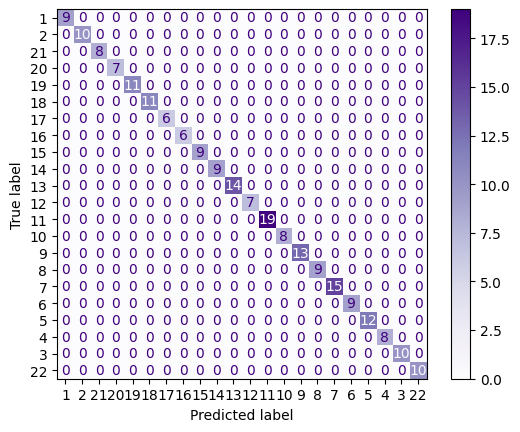

In [23]:
# Training Process
time1 = time.time()
model = df_rf(**random_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = time.time()
y_pred = model.predict(Xval)
print(df_rep(Yval,y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

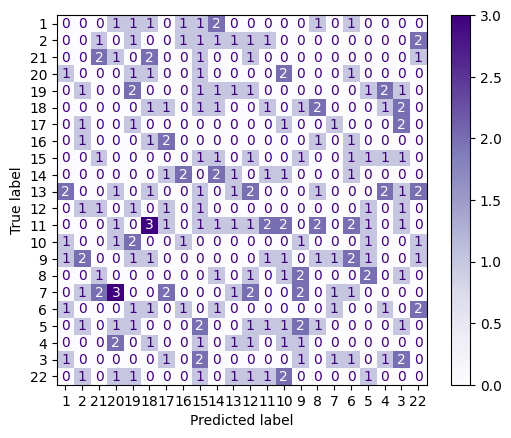

In [24]:
### Testing Process
time1 = time.time()
y_pred = model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier as dt

# Initialize the DecisionTreeClassifier
dt_model = dt(random_state=40)

# Define the parameters for RandomizedSearchCV for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with the Decision Tree model and parameters
dt_random_search = df_rsv(dt_model, dt_params, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
dt_random_search.fit(Xtrain, Ytrain)

print("\nDecision Tree Parameters selected by Randomized Search:")
print(dt_random_search.best_params_)
print("\nDecision Tree Score: ", dt_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Decision Tree Parameters selected by Randomized Search:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}

Decision Tree Score:  0.9159090909090908


Training Process : 0.03312969207763672 Seconds

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        10
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         7
           5       0.15      0.18      0.17        11
           6       0.08      0.09      0.08        11
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.06      0.11      0.08         9
          10       0.18      0.22      0.20         9
          11       0.12      0.07      0.09        14
          12       0.00      0.00      0.00         7
          13       0.25      0.11      0.15        19
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         9
          17       0.20      0.07

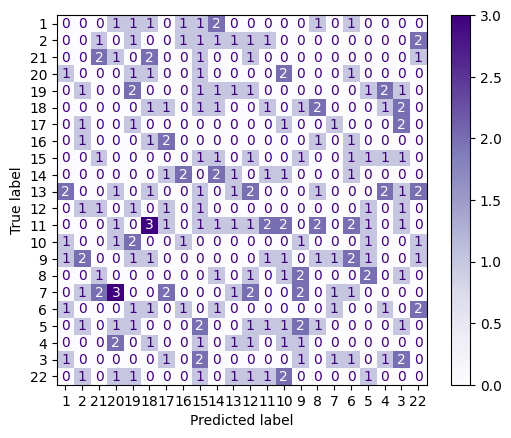

In [26]:
# Training Process
time1 = time.time()
model = dt(**dt_random_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

### Validation process
time1 = time.time()
y_pdct = model.predict(Xval)
print(df_rep(Yval, y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.75      1.00      0.86         9
           3       1.00      0.50      0.67         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       0.88      0.64      0.74        11
          16       0.90      1.00      0.95         9
          17       1.00      1.00      1.00         5
          18       0.69    

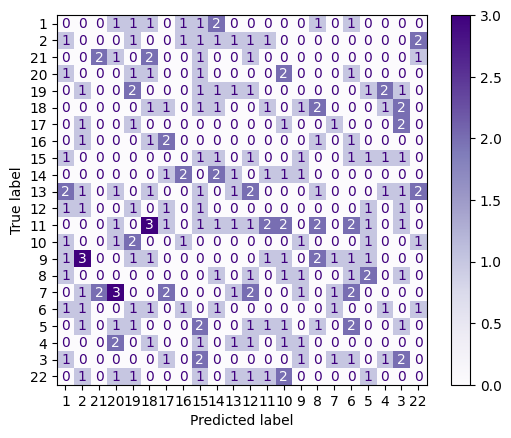

In [27]:
# Testing Process
time1 = time.time()
y_pred = model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

Support Vector Classifier

In [28]:
from sklearn.svm import SVC as svc

# Initialize the SVM classifier
svm_model = svc(random_state=40)

# Define the parameters for GridSearchCV for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with the SVM model and parameters
svm_grid_search = df_rsv(svm_model, svm_params, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
svm_grid_search.fit(Xtrain, Ytrain)

print("\nSVM Parameters selected by Random Search:")
print(svm_grid_search.best_params_)
print("\nSVM Score: ", svm_grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

SVM Parameters selected by Random Search:
{'kernel': 'linear', 'gamma': 'auto', 'C': 10}

SVM Score:  0.984659090909091


Training Process : 0.1910412311553955 Seconds

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00 

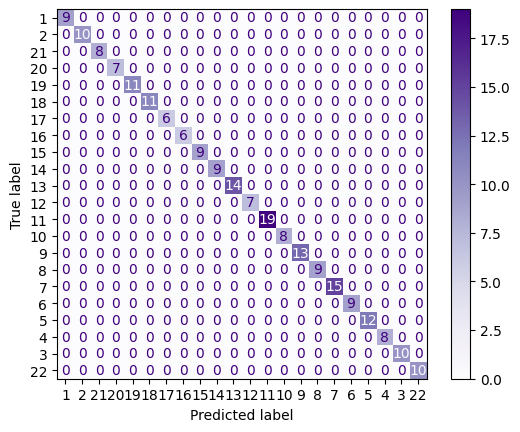

In [29]:
# Training Process
time1 = time.time()
model = svc(**svm_grid_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = time.time()
y_pred = model.predict(Xval)
print(df_rep(Yval, y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         9
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

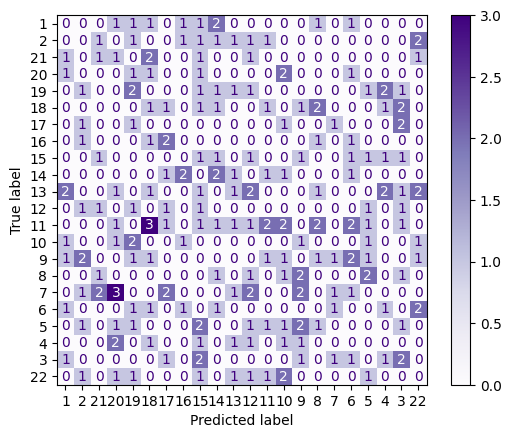

In [30]:
# Testing Process
time1 = time.time()
y_pred = model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

KNN


In [31]:
from sklearn.neighbors import KNeighborsClassifier as knn

# Initialize the KNN classifier
knn_model = knn()

# Define the parameters for RandomizedSearchCV for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV with the KNN model and parameters
knn_random_search = df_rsv(knn_model, knn_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
knn_random_search.fit(Xtrain, Ytrain)

print("\nKNN Parameters selected by Randomized Search:")
print(knn_random_search.best_params_)
print("\nKNN Score: ", knn_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

KNN Parameters selected by Randomized Search:
{'weights': 'distance', 'p': 1, 'n_neighbors': 3}

KNN Score:  0.9829545454545453


Training Process : 0.00624847412109375 Seconds

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.90      0.95        10
           3       0.89      1.00      0.94         8
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00

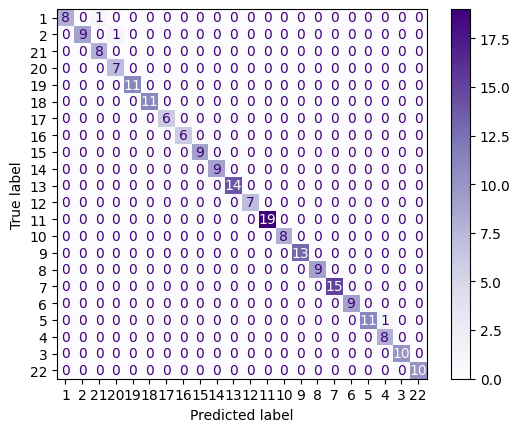

In [32]:
# Training Process
time1 = time.time()
model = knn(**knn_random_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = time.time()
y_pred = model.predict(Xval)
print(df_rep(Yval, y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00        12
           5       0.18      0.15      0.17        13
           6       0.09      0.08      0.08        13
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         6
           9       0.11      0.06      0.08        16
          10       0.22      0.18      0.20        11
          11       0.07      0.12      0.09         8
          12       0.00      0.00      0.00        13
          13       0.11      0.25      0.15         8
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         9
          17       0.07      0.20      0.10         5
          18       0.00    

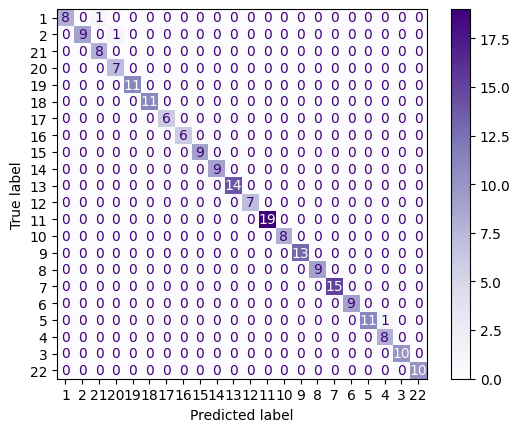

In [33]:
# Testing Process
time1 = time.time()
y_pdct = model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

crop_labels = df['crop_num'].unique()

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

**BOOSTING ALGORITHMS**

XGBoost Implementation

In [34]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [35]:
import xgboost as xgb

In [37]:
# Define the parameters for RandomizedSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Assuming Ytrain is a pandas Series, adjust labels to start from 0
Ytrain = Ytrain - 1

# Remove instances with class 22 if they are not relevant
Ytrain = Ytrain[Ytrain != 21] # 21 is the new label for class 22 after adjustment

# Re-index the data after removing instances
Xtrain = Xtrain.loc[Ytrain.index]

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=40, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV with the model and parameters
# n_iter controls the number of random combinations to try
xgb_random_search = df_rsv(xgb_model, xgb_params, n_iter=10, cv=2, verbose=10, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
xgb_random_search.fit(Xtrain, Ytrain)

print("\nXGBoost Parameters selected by Randomized Search:")
print(xgb_random_search.best_params_)
print("\nXGBoost Score: ", xgb_random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits

XGBoost Parameters selected by Randomized Search:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

XGBoost Score:  0.9916595720528975


Training Process : 0.7218465805053711 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       9.0
           2       0.00      0.00      0.00      10.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00       7.0
           5       0.00      0.00      0.00      11.0
           6       0.00      0.00      0.00      11.0
           7       0.00      0.00      0.00       6.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00       9.0
          10       0.00      0.00      0.00       9.0
          11       0.00      0.00      0.00      14.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00      19.0
          14       0.00      0.00      0.00       8.0
          15       0.00      0.00      0.00      13.0
          16       0.00      0.00 

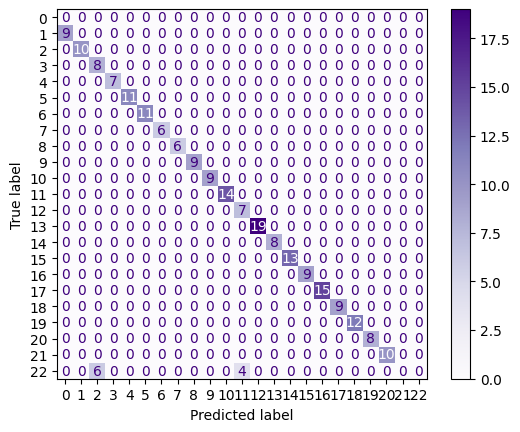

In [38]:
# Training Process
time1 = time.time()
model = xgb.XGBClassifier(**xgb_random_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

# Validation process
time1 = time.time()
y_pred = model.predict(Xval)
print(df_rep(Yval, y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = np.unique(y_pred)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = np.unique(Yval)

# Combine unique predicted and actual labels
all_labels = np.unique(np.concatenate((predicted_labels, actual_labels)))

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
df_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         7
           2       0.07      0.11      0.09         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        13
           7       0.33      0.22      0.27         9
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        11
          11       0.09      0.12      0.11         8
          12       0.05      0.08      0.06        13
          13       0.00      0.00      0.00         8
          14       0.08      0.08      0.08        12
          15       0.22      0.18      0.20        11
          16       0.00      0.00      0.00         9
          17       0.11    

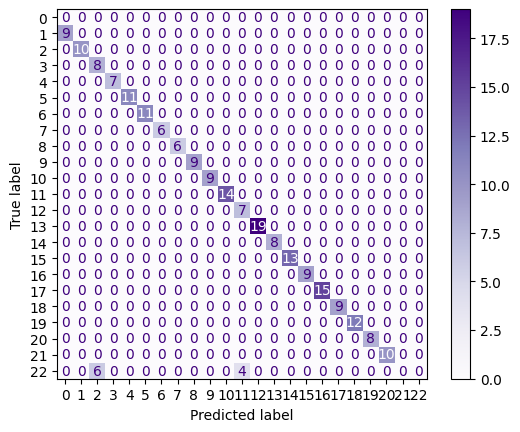

In [39]:
# Testing Process
time1 = time.time()
y_pdct = model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = np.arange(df_confM.shape[0])  # Generate labels for all classes

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

Light GBM

In [40]:
!pip install lightgbm

In [41]:
import lightgbm as lgb

In [42]:
# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=40)

# Define the parameters for RandomizedSearchCV for LightGBM
lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'num_leaves': [31, 63],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize RandomizedSearchCV with the LightGBM model and parameters
lgb_random_search = df_rsv(lgb_model, lgb_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
lgb_random_search.fit(Xtrain, Ytrain)

print("\nLightGBM Parameters selected by Randomized Search:")
print(lgb_random_search.best_params_)
print("\nLightGBM Score: ", lgb_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[Lig

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] 

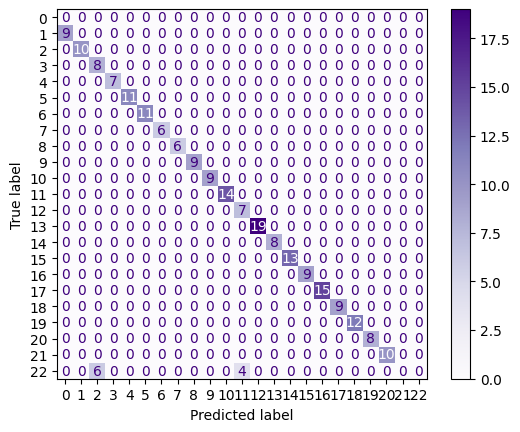

In [43]:
### Training Process
time1 = time.time()
model = lgb.LGBMClassifier(**lgb_random_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

### Validation process
time1 = time.time()
y_pdct = model.predict(Xval)
print(df_rep(Yval, y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = np.unique(y_pred)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = np.unique(Yval)

# Combine unique predicted and actual labels
all_labels = np.unique(np.concatenate((predicted_labels, actual_labels)))

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
df_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

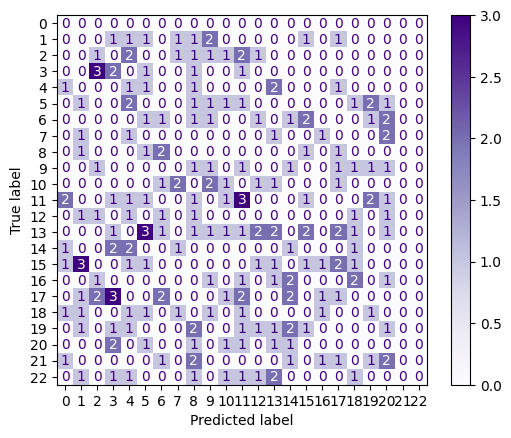

In [45]:
### Testing Process
time1 = time.time()
y_pred = model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = np.arange(df_confM.shape[0])  # Generate labels for all classes

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

Catboost

In [46]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [47]:
from catboost import CatBoostClassifier as cat

# Initialize the CatBoost classifier
catboost_model = cat(random_state=40, verbose=0)  # Suppress verbose output during training

# Define the parameters for RandomizedSearchCV for CatBoost
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3]
}

# Initialize RandomizedSearchCV with the CatBoost model and parameters
catboost_random_search = df_rsv(catboost_model, catboost_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
catboost_random_search.fit(Xtrain, Ytrain)

print("\nCatBoost Parameters selected by Randomized Search:")
print(catboost_random_search.best_params_)
print("\nCatBoost Score: ", catboost_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

CatBoost Parameters selected by Randomized Search:
{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 3}

CatBoost Score:  0.9928518123667377


0:	learn: 2.8363326	total: 8.26ms	remaining: 1.64s
1:	learn: 2.6420603	total: 14.5ms	remaining: 1.43s
2:	learn: 2.4921504	total: 20.4ms	remaining: 1.34s
3:	learn: 2.3454367	total: 27.2ms	remaining: 1.33s
4:	learn: 2.2573671	total: 33.7ms	remaining: 1.31s
5:	learn: 2.1404420	total: 39.4ms	remaining: 1.27s
6:	learn: 2.0505432	total: 45ms	remaining: 1.24s
7:	learn: 1.9451618	total: 50.9ms	remaining: 1.22s
8:	learn: 1.8649054	total: 56.5ms	remaining: 1.2s
9:	learn: 1.8181254	total: 62.5ms	remaining: 1.19s
10:	learn: 1.7538761	total: 68.2ms	remaining: 1.17s
11:	learn: 1.6780564	total: 73.9ms	remaining: 1.16s
12:	learn: 1.6039326	total: 79.6ms	remaining: 1.15s
13:	learn: 1.5372333	total: 86.2ms	remaining: 1.15s
14:	learn: 1.4829676	total: 92ms	remaining: 1.14s
15:	learn: 1.4438492	total: 98ms	remaining: 1.13s
16:	learn: 1.4004968	total: 103ms	remaining: 1.11s
17:	learn: 1.3515871	total: 109ms	remaining: 1.1s
18:	learn: 1.2908991	total: 114ms	remaining: 1.09s
19:	learn: 1.2389902	total: 120ms

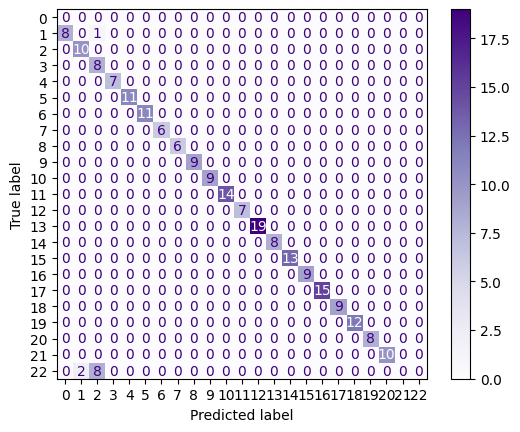

In [48]:
### Training Process
time1 = time.time()
model = cat(**catboost_random_search.best_params_)
model.fit(Xtrain, Ytrain)
time2 = time.time()
print("Training Process :", time2-time1, "Seconds\n")

### Validation process
time1 = time.time()
y_pred = model.predict(Xval)
print(df_rep(Yval, y_pred))
time2 = time.time()
print("Validation Process :", time2-time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = np.unique(y_pred)

# Get all unique actual labels (assuming Yval contains all possible labels)
actual_labels = np.unique(Yval)

# Combine unique predicted and actual labels
all_labels = np.unique(np.concatenate((predicted_labels, actual_labels)))

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
df_plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

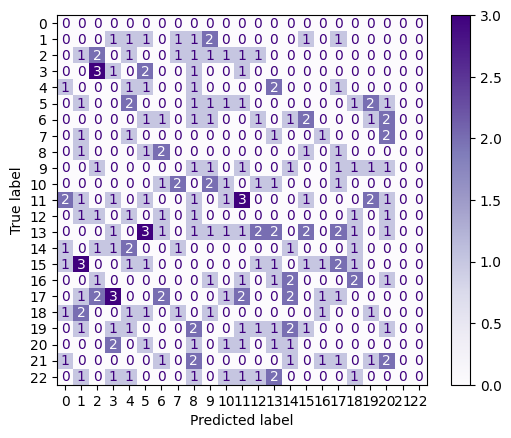

In [49]:
### Testing Process
time1 = time.time()
y_pred =model.predict(Xtest)
print(df_rep(Ytest, y_pred))
time2 = time.time()
print("Testing Process :", time2-time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = np.arange(df_confM.shape[0])  # Generate labels for all classes

df_confM = df_confusM(Yval, y_pred)
df_disp(confusion_matrix = df_confM, display_labels = crop_labels).plot(cmap = 'Purples')
df_plt.show()

In [51]:
import numpy as Nump
import tensorflow as TFlo
import time as t
from tensorflow.keras.layers import Reshape as reshape
from tensorflow.keras.layers import Attention as cr_Attention
from tensorflow.keras.layers import Concatenate as Concatenate
from tensorflow.keras.layers import GlobalAveragePooling1D as GAPooling
from tensorflow.keras.models import Model as Model
from tensorflow.keras.optimizers import Adam as Adam
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report as cr
import matplotlib.pyplot as plt

In [60]:
df_Ip = df.drop('crop_num',axis=1)
df_Op = df['crop_num']

In [62]:
from sklearn.model_selection import train_test_split as split

Xtrain, Xtest, Ytrain, Ytest = split(df_Ip, df_Op, test_size=0.2, random_state= 30)
Xval, Xtest, Yval, Ytest = split(Xtest, Ytest, test_size= 0.5, random_state= 30)

In [65]:
import warnings as wgs
wgs.filterwarnings("ignore")

In [66]:
def build_simple_model(input_shape, num_blocks, num_classes):
    off_ip_layer = Input(shape=(input_shape,))
    off_block_size = input_shape // num_blocks
    off_attention_outputs = []

    for t in range(num_blocks):
        start = t * off_block_size
        end = (t + 1) * off_block_size

        # Extract the current block
        off_block_input = off_ip_layer[:, start:end]

        # Self-Attention Layer for the current block
        off_attention = Attention()([off_block_input, off_block_input])

        # Reshape the output of the attention layer
        off_reshaped_attention = reshape((-1,))(off_attention)

        off_attention_outputs.append(off_reshaped_attention)

    # Concatenate the attention outputs
    off_merged_attention = Concatenate()(off_attention_outputs)

    # Reshape the merged attention for GlobalAveragePooling1D
    off_merged_attention_reshaped = reshape((num_blocks, -1))(off_merged_attention)

    # Global Average Pooling Layer
    off_global_avg = GAPooling()(off_merged_attention_reshaped)

    # Output layer for binary classification
    # Output layer now handles 23 classes (0 to 22 inclusive)
    off_op_layer = Dense(num_classes + 1, activation='softmax')(off_global_avg)

    off_model = Model(inputs=off_ip_layer, outputs=off_op_layer)
    off_model.compile(optimizer=crs_Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return off_model

# Training and evaluation
# Calculate the number of classes to include '22'
num_classes = len(df_Op.unique())
input_shape = Xtrain.shape[1]

for num_blocks in [3,4,5,6]:
  print(f"\nTraining Transformer-like model with {num_blocks} blocks")

  off_model = build_simple_model(input_shape, num_blocks, num_classes)

  period1 = t.time()
  off_model.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=15, batch_size=64)
  period2 = t.time()
  print("\nTraining Period :", period2 - period1,"\n")

  # Evaluation
  val_predictions = off_model.predict(Xval)
  val_predicted_classes = Nump.argmax(val_predictions, axis=1)
  test_predictions = off_model.predict(Xtest)
  test_predicted_classes = Nump.argmax(test_predictions, axis=1)

  print(f"\nValidation Classification Report for {num_blocks} blocks:\n", cr(Yval, val_predicted_classes))
  print(f"\nTest Classification Report for {num_blocks} blocks:\n", cr(Ytest, test_predicted_classes))

  val_cm = cm(Yval, val_predicted_classes)
  test_cm = cm(Ytest, test_predicted_classes)

  print(f"\nValidation Confusion Matrix for {num_blocks} blocks:\n")
  #Corrected number of display labels to match the confusion matrix
  cmd(confusion_matrix=val_cm, display_labels=range(num_classes)).plot(cmap='Purples')
  plt.show()




Training Transformer-like model with 3 blocks
Epoch 1/15


ValueError: Exception encountered when calling Attention.call().

[1mDimension must be 2 but is 3 for '{{node functional_5_1/attention_17_1/transpose}} = Transpose[T=DT_FLOAT, Tperm=DT_INT32](functional_5_1/strided_slice, functional_5_1/attention_17_1/transpose/perm)' with input shapes: [?,2], [3].[0m

Arguments received by Attention.call():
  • inputs=['tf.Tensor(shape=(None, 2), dtype=float32)', 'tf.Tensor(shape=(None, 2), dtype=float32)']
  • mask=['None', 'None']
  • training=True
  • return_attention_scores=False
  • use_causal_mask=False